Dataset to be used: Ames Housing Dataset (ames_housing.csv)

We will be working on the Ames Housing Dataset. Specifically, you will have to predict SalePrice using the predictors in the dataset. Here is what you have to do:

1. Build a linear regression model from scratch. Almost all the code can be gleaned from my slides. use gradient descent with mini-batch for this purpose. You may use 70% of the data for training and the remaining 30% for testing. Be sure to preprocess your data before you train your model. The loss function/metric you will use is MSE. Plot the loss function against the number of iterations. The plot should include both train and test.

2. Use sklearn's LinearRegression algorithm to perform regression on the same dataset. Again, report MSE.

3. Use KNeighborsRegressor and re-run the analysis. Use your train set to determine the optimum value of K. Re-train your model with K and use it to get the MSE for your test dataset. Report MSE and plot MSE vs. Iterations.




In [ ]:
#Connect Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#All the imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science Colab/ames_housing.csv")
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [ ]:
#Convert categorical 'Central Air' feature to numeric
import warnings
warnings.filterwarnings('ignore')

df['Central Air'] = df['Central Air'].replace({'Y': 1, 'N': 0}).astype(float)


df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1.0,1656,215000
1,5,6,882.0,1.0,896,105000
2,6,6,1329.0,1.0,1329,172000
3,7,5,2110.0,1.0,2110,244000
4,5,5,928.0,1.0,1629,189900


Check for missing values

In [ ]:
#Check for missing values
df.isnull().sum()
#we have a row where Total Bsmt is null.

#remove this row where we got a null value
df.dropna(subset=['Total Bsmt SF'], inplace=True)

df.isnull().sum()
#now we have no nulls

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,0
Central Air,0
Gr Liv Area,0
SalePrice,0


In [ ]:
# Separate predictors and target variable
X = df.drop(columns=['SalePrice'])
y = df['SalePrice'].values

print(X.shape)
print(y.shape)

(2929, 5)
(2929,)


In [ ]:

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18, shuffle=True)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Iteration 0: Train Loss = 38984361969.5757, Test Loss = 39084344431.49376
Iteration 100: Train Loss = 31542609352.805405, Test Loss = 31514268757.033134
Iteration 200: Train Loss = 25584699803.87297, Test Loss = 25445939448.65865
Iteration 300: Train Loss = 20908737446.98637, Test Loss = 20685412946.48951
Iteration 400: Train Loss = 17152488116.408497, Test Loss = 16860931108.69652
Iteration 500: Train Loss = 14185204001.652397, Test Loss = 13852670630.84883
Iteration 600: Train Loss = 11782190794.935965, Test Loss = 11414110404.588066
Iteration 700: Train Loss = 9904425910.691172, Test Loss = 9517498151.432823
Iteration 800: Train Loss = 8368672667.405984, Test Loss = 7967477842.84637
Iteration 900: Train Loss = 7120451937.316101, Test Loss = 6713427488.716986
Iteration 1000: Train Loss = 6126091081.750857, Test Loss = 5718142751.061907
Iteration 1100: Train Loss = 5308631791.890062, Test Loss = 4901423205.102271
Iteration 1200: Train Loss = 4632048879.989782, Test Loss = 4222381568.3

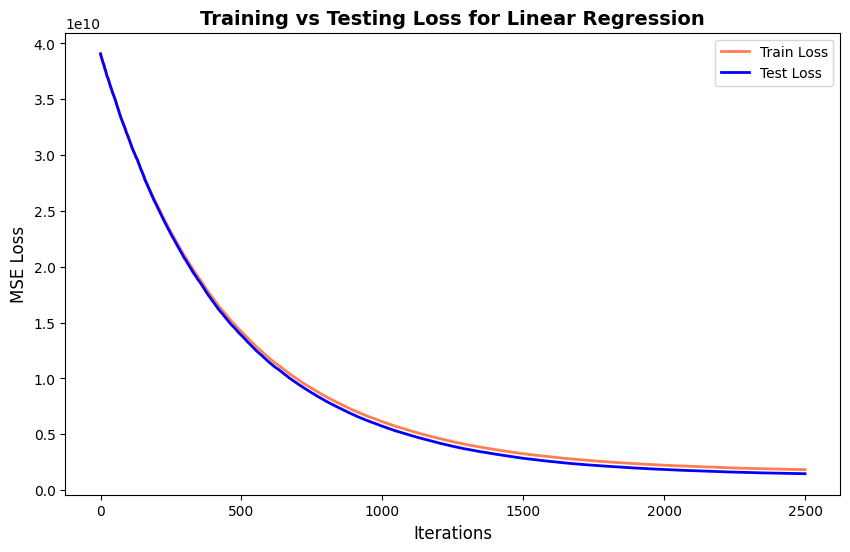


Final Training MSE: 1833000081.757815
Final Testing MSE: 1467943318.1540225


In [ ]:
#all weights will be zero to start with
def initialize_params(n_features):
    W = np.zeros(n_features)
    return W

def predict(X, W):
    return np.dot(X, W)

#MSE
def compute_cost(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

#Performs one iteration of gradient descent to update the weights
def update_weights(X, y, W, learning_rate, batch_size):
    m = X.shape[0]
    idx = np.random.choice(m, batch_size, replace=False)
    X_batch = X[idx]
    y_batch = y[idx]

    # Predictions and gradients
    y_pred = predict(X_batch, W)
    dW = (1 / batch_size) * np.dot(X_batch.T, (y_pred - y_batch))

    W -= learning_rate * dW
    return W

def train_lr(X_train, y_train, X_test, y_test, learning_rate=0.001, iterations=2500, batch_size=32, fit_intercept=True):
    # If fit_intercept is True, add a column of ones to include an intercept in the model, so using hstack
    if fit_intercept:
        X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
        X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    n_features = X_train.shape[1]
    W = initialize_params(n_features)

    train_losses = []
    test_losses = []

    for i in range(iterations):
        W = update_weights(X_train, y_train, W, learning_rate, batch_size)

        # Compute training and testing cost
        train_loss = compute_cost(predict(X_train, W), y_train)
        test_loss = compute_cost(predict(X_test, W), y_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # print the MSE every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss = {train_loss}, Test Loss = {test_loss}")

    return W, train_losses, test_losses

#call function
W, train_losses, test_losses = train_lr(X_train_scaled, y_train, X_test_scaled, y_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", color='Coral', linewidth=2)
plt.plot(test_losses, label="Test Loss", color='Blue', linewidth=2)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("MSE Loss", fontsize=12)
plt.title("Training vs Testing Loss for Linear Regression", fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

# Final training and testing MSE
print("")
print(f"Final Training MSE: {train_losses[-1]}")
print(f"Final Testing MSE: {test_losses[-1]}")

Overfitting Prevention: A stable test loss can also be a good sign in terms of preventing overfitting. If the test loss were increasing while the training loss continued to decrease, it would indicate that the model was starting to memorize the training data rather than learning to generalize from it.

In [ ]:
#Using Linear Regression form sklearn.linear_model

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#MSE for both the train and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


Train MSE: 1593221786.651238
Test MSE: 1292525452.5610363


In [ ]:
#For most typical use cases, especially where the dataset fits comfortably in memory and the number of features isn’t
#excessively high, Sklearn’s LinearRegression will not only be simpler to implement but also provide optimal performance.

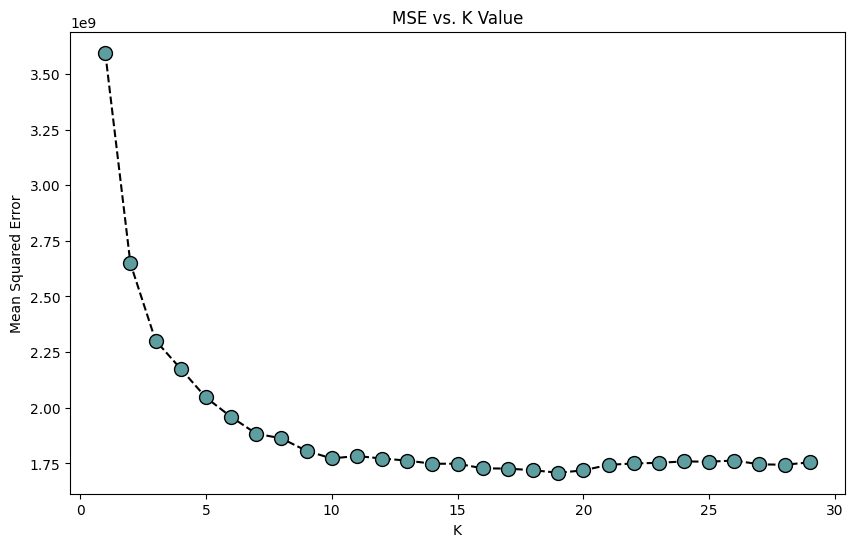


The optimal number of neighbors is 19 with a minimum MSE of 1708068827.259994


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


mse_values_KNeighbors = []

# Loop over a range of K values to find the best one
for i in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    mse_values_KNeighbors.append(mse)

# Identify the best K (the one with the lowest MSE)
optimal_k = mse_values_KNeighbors.index(min(mse_values_KNeighbors)) + 1  # +1 because index is zero-based

# Plot MSE vs. K values

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), mse_values_KNeighbors, color='black', linestyle='dashed', marker='o',
         markerfacecolor='cadetblue', markersize=10)
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.show()

print("")
print(f"The optimal number of neighbors is {optimal_k} with a minimum MSE of {min(mse_values_KNeighbors)}")